In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Load the cleaned dataset
file_path = 'vgsales_cleaned.csv'  # Replace with the correct file path
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Dataset not found. Please check the file path.")
    exit()

In [14]:
# Ensure sales columns are scaled
sales_columns = [col for col in df.columns if 'Sales' in col]

# Set a consistent theme for visuals
sns.set_theme(style="whitegrid")

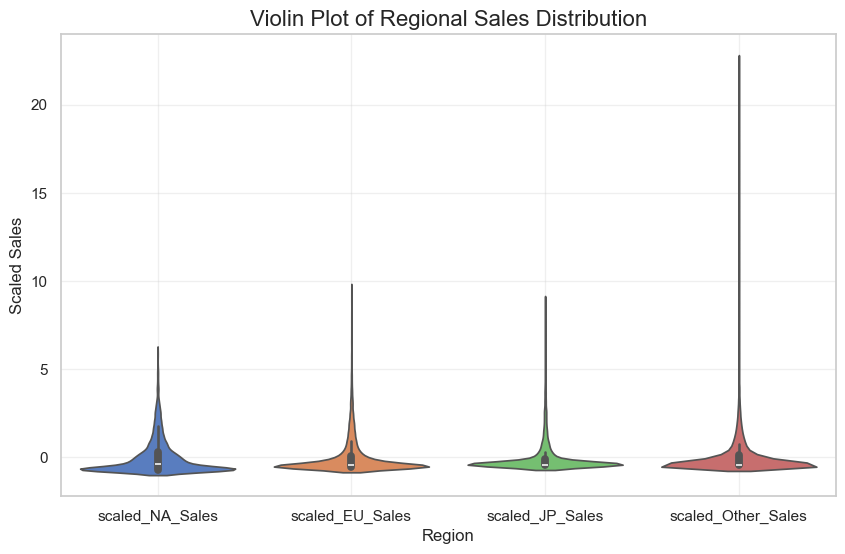

In [15]:
# Figure 1: Violin plot of regional sale distribution
# Prepare the data for the violin plot
regional_sales = ['scaled_NA_Sales', 'scaled_EU_Sales', 'scaled_JP_Sales', 'scaled_Other_Sales']
df_melted = df[regional_sales].melt(var_name='Region', value_name='Sales')

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Region', y='Sales', data=df_melted, hue='Region', palette='muted', dodge=False, legend=False)
plt.title('Violin Plot of Regional Sales Distribution', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Scaled Sales', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

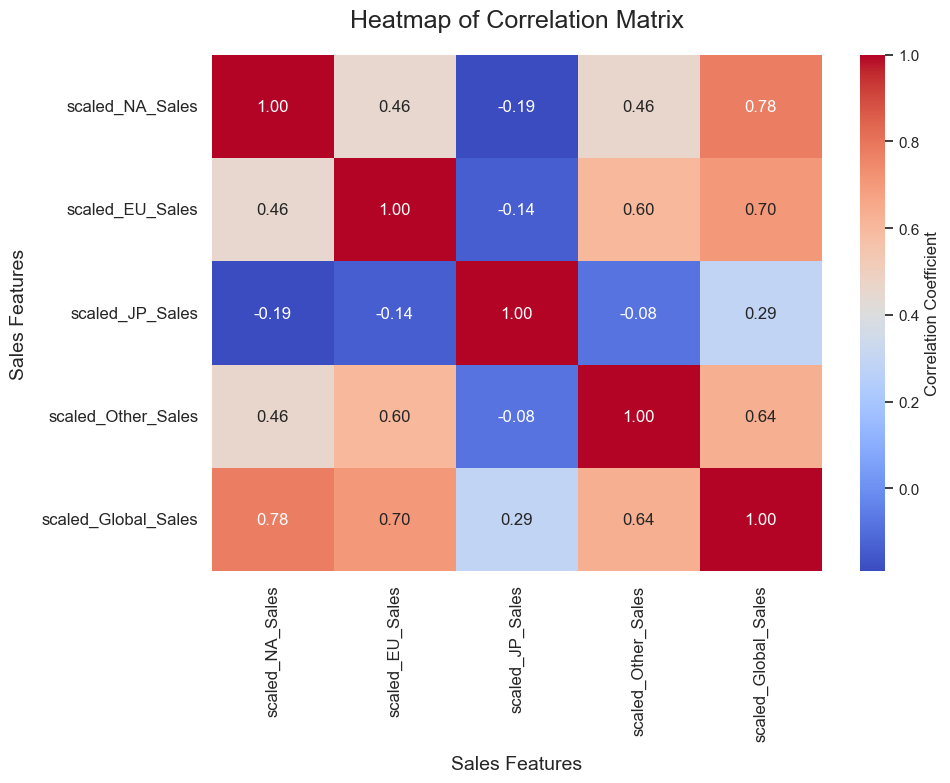

In [16]:
# Figure 2: Heatmap of Correlation Matrix
correlation_matrix = df[sales_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            cbar_kws={'label': 'Correlation Coefficient'})  # Add a label to the color bar
plt.title('Heatmap of Correlation Matrix', fontsize=18, pad=20)  # Add title with padding
plt.xlabel('Sales Features', fontsize=14, labelpad=10)  # Label for the x-axis with padding
plt.ylabel('Sales Features', fontsize=14, labelpad=10)  # Label for the y-axis with padding
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()

In [17]:
#	Figure 3: Scatter Plot of Predicted vs Actual global Sales 
# this figure can be found in the analysis code 

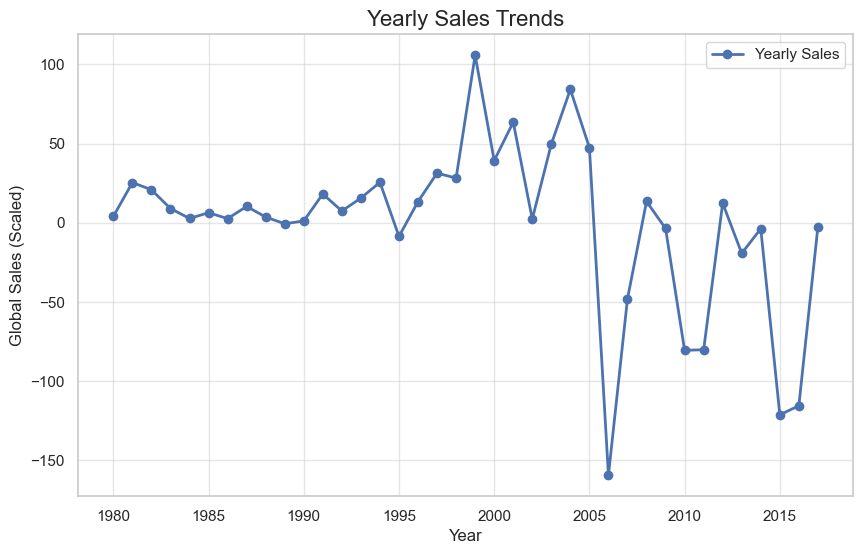

In [18]:
# Figure 4: Yearly Sales Trends (Line Graph)
plt.figure(figsize=(10, 6))
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Ensure Year is in datetime format
yearly_sales = df.groupby(df['Year'].dt.year)['scaled_Global_Sales'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', linewidth=2, label='Yearly Sales')
plt.title('Yearly Sales Trends', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (Scaled)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

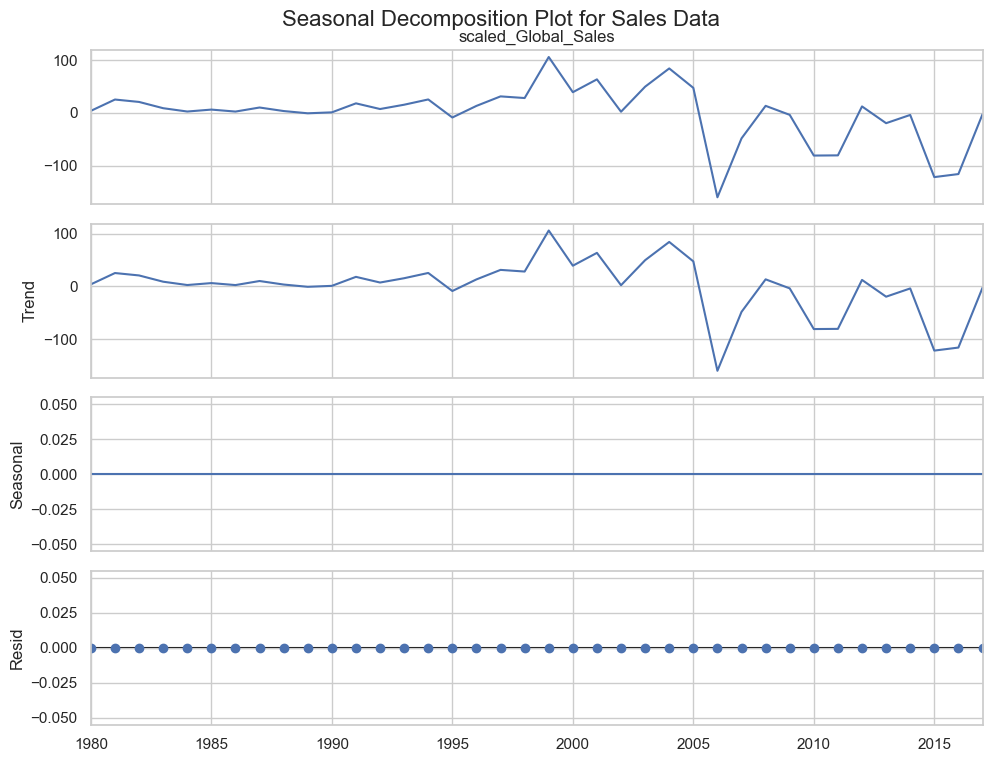

In [19]:
# Figure 5: Seasonal Decomposition Plot for Sales Data
# Assuming `yearly_sales` is defined and contains the sales data
decomposed = seasonal_decompose(yearly_sales, model='additive', period=1)  # Period = 1 for yearly data

fig = decomposed.plot()
fig.set_size_inches(10, 8)  # Adjust the figure size
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.subplots_adjust(top=0.9)  # Add extra space for the title
plt.suptitle('Seasonal Decomposition Plot for Sales Data', fontsize=16, y=0.95)  # Adjust title position
plt.show()

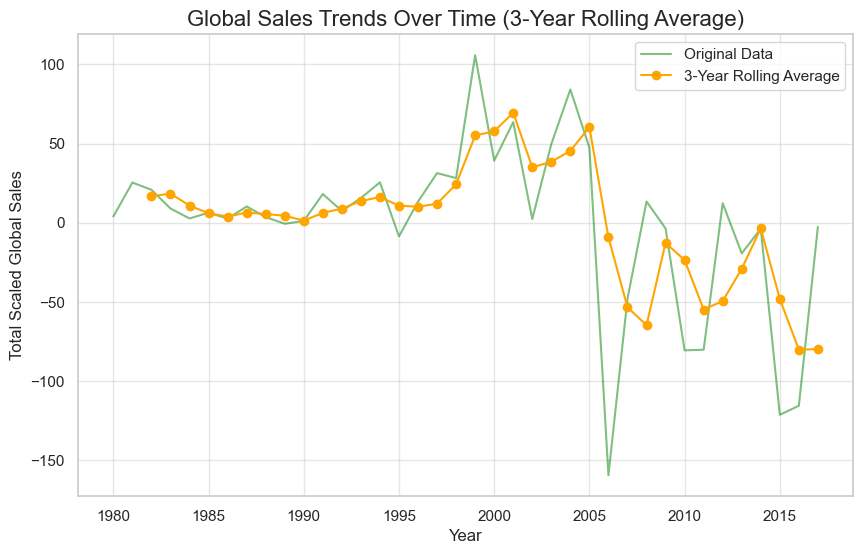

In [20]:
# Figure 6: Global Sales Trends Over Time (3-Year Rolling Average)
plt.figure(figsize=(10, 6))
rolling_avg = yearly_sales.rolling(window=3).mean()
plt.plot(yearly_sales.index, yearly_sales.values, label='Original Data', alpha=0.5, color='green')
plt.plot(rolling_avg.index, rolling_avg.values, marker='o', label='3-Year Rolling Average', color='orange')
plt.title('Global Sales Trends Over Time (3-Year Rolling Average)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Scaled Global Sales', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


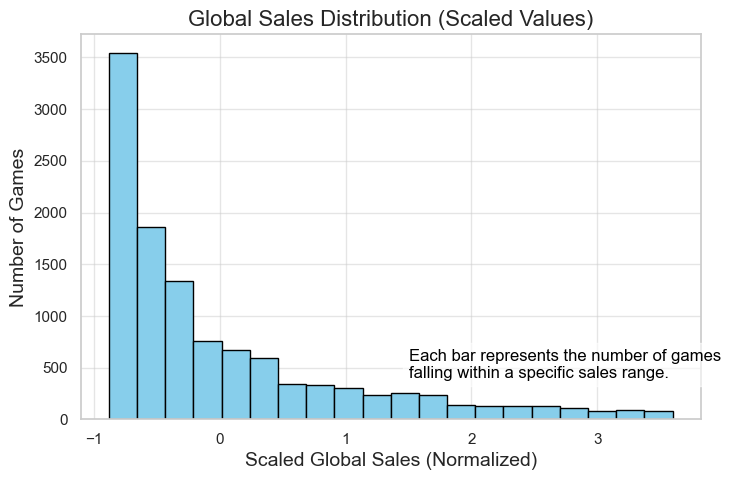

In [21]:
# Figure 7: Distribution of Global Sales (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(df['scaled_Global_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Global Sales Distribution (Scaled Values)', fontsize=16)
plt.xlabel('Scaled Global Sales (Normalized)', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.grid(alpha=0.5)
plt.text(1.5, 400, 'Each bar represents the number of games\nfalling within a specific sales range.', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.6))
plt.show()


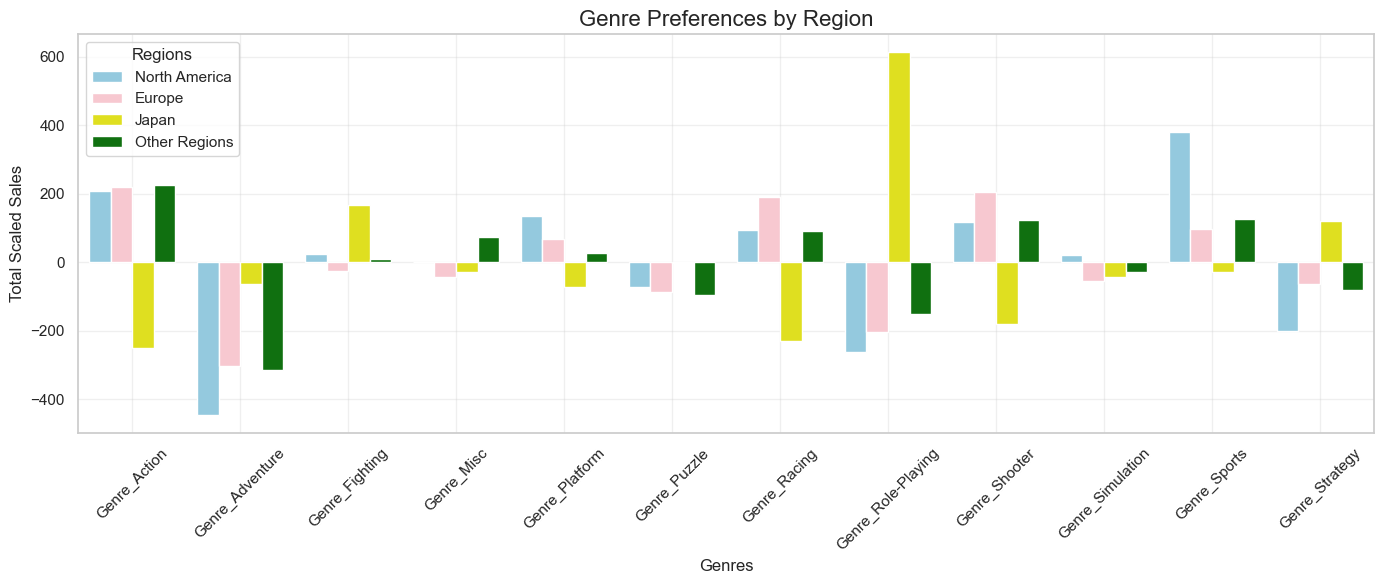

In [22]:
# Figure 8:Genere prefrences by Region
# Define regions and genres
regional_sales = ['scaled_NA_Sales', 'scaled_EU_Sales', 'scaled_JP_Sales', 'scaled_Other_Sales']
genre_columns = df.filter(like='Genre_').columns

# Aggregate sales by genre and region
genre_region_sales = {region.split('_')[1]: df[genre_columns].mul(df[region], axis=0).sum() for region in regional_sales}
genre_region_df = pd.DataFrame(genre_region_sales).reset_index()
genre_region_df.columns = ['Genre', 'North America', 'Europe', 'Japan', 'Other Regions']

# Melt the data for visualization
genre_region_melted = genre_region_df.melt(id_vars='Genre', var_name='Region', value_name='Total Sales')

# Define the exact colors to match the uploaded image
custom_palette = {
    'North America': 'skyblue',
    'Europe': 'pink',
    'Japan': 'yellow',
    'Other Regions': 'green'
}

# Create the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=genre_region_melted,
    x='Genre',
    y='Total Sales',
    hue='Region',
    errorbar=None,
    palette=custom_palette
)
plt.title('Genre Preferences by Region', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Total Scaled Sales', fontsize=12)
plt.legend(title='Regions', loc='upper left')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
# Figure 9: MAE and MSE Comparison of Models
# code for this figure in Analysis file